# **Tutorial for logreg.py**
---
##### Author: Patrick Erickson
The following is a tutorial on how to use all of the methods in the logreg.py file. Feel free to refer to this if you need help with usage.

# Loading, Cleaning, and Processing the Data Correctly

---
**Step 1:** Import your required libraries, along with logreg.

In [113]:
import numpy as np
import pandas as pd
from logreg import LogisticRegression

**Step 2:** Do any data cleaning and pre-processing needed to get the data ready for modeling. Notice we seed things HERE for reproduceability. Many other functions will have this option. Secondly, we save our column names. This is because numpy gets rid of the columns when we turn pandas to numpy dataframes.


In [114]:
np.random.seed(100)
df = (pd.read_csv("datasets/breast_cancer.csv")).dropna()

columns = df.columns.to_list()


**Step 3:** Here we clean, turn the data to numpy, and set up for the rest of the model. In order for the model to work, ensure there are:
  - No NULL/NAN values
  - All variables are NUMERIC, not CATEGORICAL (only works with ints, doubles, floats)
  - the label feature is binary, and it is an **int of 0 or 1**

Refer to the example EDA file as to why I do the following cleaning steps:

In [115]:
df.replace({'Class': {2: 0, 4: 1}}, inplace=True)
df = df.to_numpy()
df = df.astype(int)
split = np.split(df, [9], axis=1)
df = split[0]
labels = split[1]

Our data is now ready to use with the logreg.py file.

# Train/Test Split
---
Here is an example on how to call train-test split
  - NOTE: You do not have to specify train and test size. Default is .2 test .8 train
  - NOTE: if randomState is not specified (ie, none), does not seed the split.
  
**This is how you would use train/test split:**

In [116]:
trainingSet,trainingLabels,testingSet,testingLabels = LogisticRegression.trainTestSplit(df,labels,testSize=.2,trainSize=.8, randomState=None)


**You can also call train/test split with the minimum arguments as such:**

In [117]:
trainingSet,trainingLabels,testingSet,testingLabels = LogisticRegression.trainTestSplit(df,labels) # minimum arguments

# Standardization
---

This is done to ensure all of the data is centered with a mean of 0 and standard deviation of 1. This helps with model training, and is generally recommended you do it before running any model.

**The following is how you would use standardizer:**

In [118]:
Standardizer = LogisticRegression.standardizer(trainingSet)
trainingSet = LogisticRegression.standardizeCompute(trainingSet,Standardizer)
testingSet = LogisticRegression.standardizeCompute(testingSet,Standardizer)

# Training Models
---

You have 2 options for training a model. Cross-Validation, and fit:
  - Cross validation is 5 fits on partitioned sets of the data, determined by the number of folds.
  - fit, which runs only once on the training dataaset

#### Parameters, inputs, outputs
  - loss, if not specified, defaults to GD (can choose between GD and SGD)
  - **If using SGD:** Batch Size: Determines the size of the batch you take the gradient of (mini-batch gd). 1 is default, which is just SGD.
  - epochs, if not specified, defaults to 1000 (Note this is very big for SGD)
  - learningRate, if not specified, defaults to .01
  - alpha, if not specified, does unregularized regression
  - lambda is default to 0. NOTE: lam will not do anything unless alpha is also specified. Will still throw error you you set lam negative.
  - folds for cross validation is defaulted at 5
  - probability threshold is default .5
  - randomState is default to none. will otherwise seed with specified number.
  - there is a loss history attached to both, and accuracy for cv. 

### **Here are some examples of how you can use cross validation:**

In [119]:
crossValidationModels, cvlossHistories, cvaccuracies = LogisticRegression.crossfoldValidation(trainingSet,
                                                                                                trainingLabels,
                                                                                                loss='GD',
                                                                                                learningRate=.01,
                                                                                                alpha=None,
                                                                                                lam=0,
                                                                                                epochs=1000,
                                                                                                folds=5,
                                                                                                probabilityThreshold=.5,
                                                                                                randomState=None,
                                                                                                batchSize=1) # note this does nothing, because we are not using SGD
cvModelMinArg,_,_ = LogisticRegression.crossfoldValidation(trainingSet,trainingLabels) # minimum args for cv. Use _ if you don't want the loss histories or accuracies.

Here's what the models from cross validation would look like:

In [120]:
print("All Models: ", crossValidationModels)

All Models:  [array([[-0.13157176],
       [ 0.78349523],
       [ 1.70231502],
       [ 2.65841028],
       [ 1.434566  ],
       [-1.37858659],
       [ 0.06518169],
       [-0.13019312],
       [ 1.31662998],
       [-0.04044715]]), array([[-0.10757511],
       [ 0.77941341],
       [ 0.4138045 ],
       [ 0.10678509],
       [ 1.39566048],
       [ 0.20947853],
       [ 1.17268024],
       [ 1.26479552],
       [-0.33327215],
       [ 0.78495687]]), array([[ 0.58515817],
       [ 0.9692789 ],
       [ 1.48304045],
       [ 1.18666648],
       [ 0.26772109],
       [ 0.74013295],
       [ 0.42184369],
       [-0.0587415 ],
       [ 0.73652766],
       [ 0.09503221]]), array([[-0.40818477],
       [ 0.7112078 ],
       [ 0.0716262 ],
       [ 1.40886228],
       [ 0.71677447],
       [ 0.61136815],
       [ 0.958135  ],
       [-0.06222794],
       [-0.05106365],
       [ 1.43255903]]), array([[-0.16325378],
       [ 0.45167902],
       [ 0.48528282],
       [ 0.72917204],
       [ 0

Notice that these are 5 different models. You would get more models for more folds.

In [121]:
print("Fold Accuracies: ", cvaccuracies)

Fold Accuracies:  [0.945455, 0.963303, 0.990826, 0.963303, 0.93578]


You could pick the best like such:

In [122]:
# Based on the best accuracy from the previous model
bestOfFolds = crossValidationModels[2]
print("Best Model:", bestOfFolds)


Best Model: [[ 0.58515817]
 [ 0.9692789 ]
 [ 1.48304045]
 [ 1.18666648]
 [ 0.26772109]
 [ 0.74013295]
 [ 0.42184369]
 [-0.0587415 ]
 [ 0.73652766]
 [ 0.09503221]]


You can average the models together as well. Use np.mean with axis 0, since these models are represented as (number of features x 1 x number of folds) tensors. Here is an example:

In [123]:
# average the models
# NOTE: weights are given as a dx1xfolds tensor. To take mean, do it with respect to axis 0.
# We will use this for the majority of the examples for ease.
model = np.mean(crossValidationModels, axis=0)
print("Averaged Model: ", model)

Averaged Model:  [[-0.04508545]
 [ 0.73901487]
 [ 0.8312138 ]
 [ 1.21797923]
 [ 0.8108891 ]
 [ 0.13771028]
 [ 0.65271533]
 [ 0.55398473]
 [ 0.39358756]
 [ 0.43883109]]


Loss histories are hard to visualize, so I made a pyplot visualization for them. We will see this later.

### **Here are some examples of how you can use fit:**

In [124]:
model1, lossHistory1 = LogisticRegression.fit(trainingSet,trainingLabels,loss='GD',alpha=0,lam=0.01) # alpha = 0 fpr ridge regression
model2, lossHistory2 = LogisticRegression.fit(trainingSet,trainingLabels,loss='GD',alpha=1,lam=0.01) # alpha = 1 for lasso regression
model3, lossHistory3 = LogisticRegression.fit(trainingSet,trainingLabels,loss='GD',alpha=.5,lam=0.01) # ElasticNet is any value between 0 and 1
model5, lossHistory4 = LogisticRegression.fit(trainingSet, trainingLabels, loss='SGD',epochs=50,alpha=0,lam=.01, batchSize=1) # SGD Example. Can specify bigger batches for mini-batch GD
model4, _ = LogisticRegression.fit(trainingSet, trainingLabels) # minimum args. Use _ if you don't want the value.

# Visualizations
---

## Loss

I covered that loss histories were a little hard to understsand. There is a function that allows you to visualize these as a function of the epochs (iterations over the entire dataset). This function takes in a lossHistory, for which for cross validation is an array of 5 loss histories.

**For example, for the cross validation set, we can see how each training chunk did:**

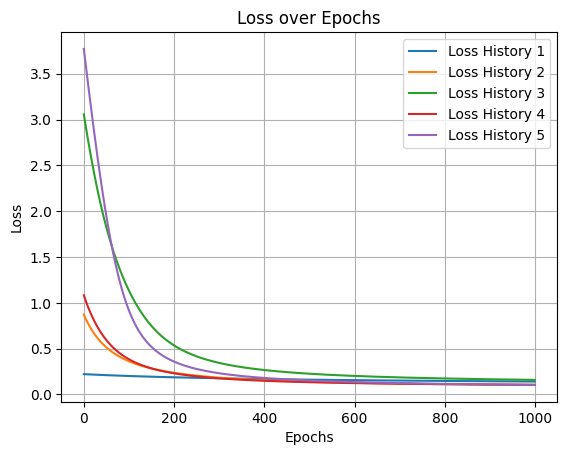

In [125]:
# You can use loss histories to plot loss over epochs graphs
# NOTE: Only up to 10 loss histories at a time
LogisticRegression.displayLossOverEpochs(cvlossHistories) # cross validation loss over epochs graphs

**Alternatively, you can combine multiple models as such:**

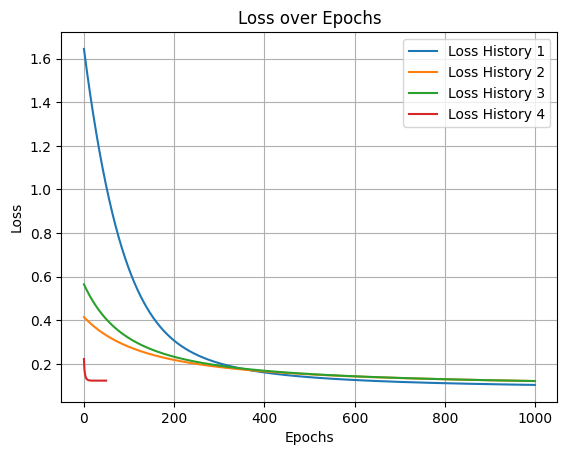

In [126]:
LogisticRegression.displayLossOverEpochs([lossHistory1,lossHistory2,lossHistory3,lossHistory4])  # loss over epoch graphs for all the other fit functions we described

If you want to combine cv loss histories and fit loss histories, you can do it as such:

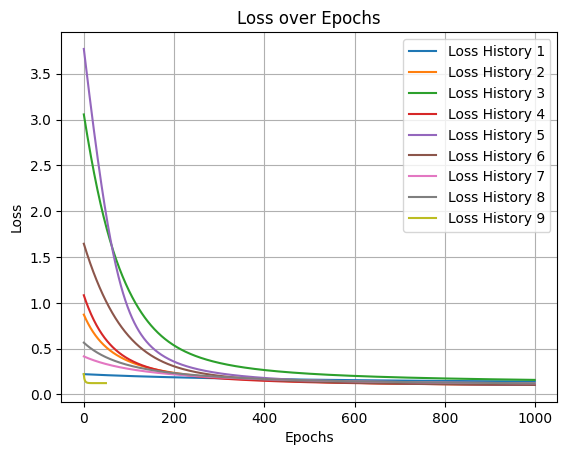

In [127]:
cvlossHistories.append(lossHistory1)
cvlossHistories.append(lossHistory2)
cvlossHistories.append(lossHistory3)
cvlossHistories.append(lossHistory4)
LogisticRegression.displayLossOverEpochs(cvlossHistories)

### Note: this only works for up to 10 loss histories. This is to reduce noise of the graphs.
Lastly, if we wanted to get the final loss history, we could do something like:

In [128]:
finalHistory = lossHistory1[-1]
print("Final Loss for model 1: ", finalHistory)

Final Loss for model 1:  0.10358203865688811


## Classification Report

**You can get a popout of the classification report by calling the following:**

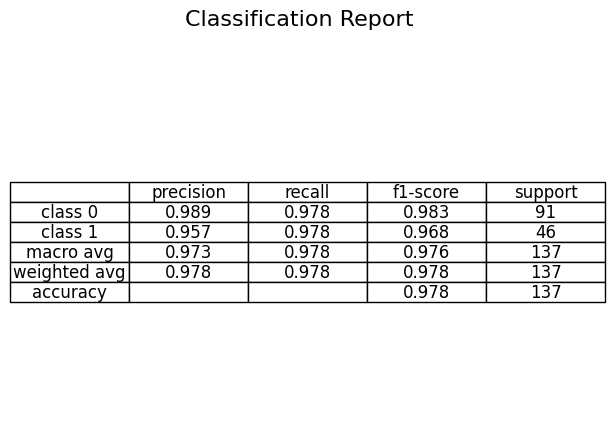

In [129]:
# displays the classification report in a sci-kit style manner
# if probability is not specified, defaults to .5.
LogisticRegression.displayClassificationReport(testingSet,testingLabels,model,probabilityThreshold=.5)

We can also change the probability threshold, and it will update accordingly:

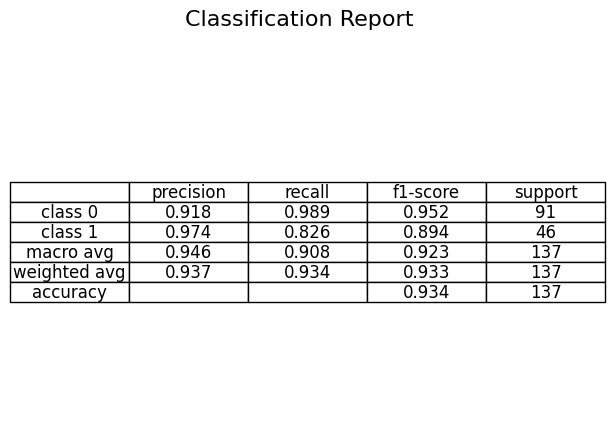

In [130]:
LogisticRegression.displayClassificationReport(testingSet,testingLabels,model,probabilityThreshold=.9)

## Confusion Matrix

**You can get a popout of the confusion matrix by calling the following:**

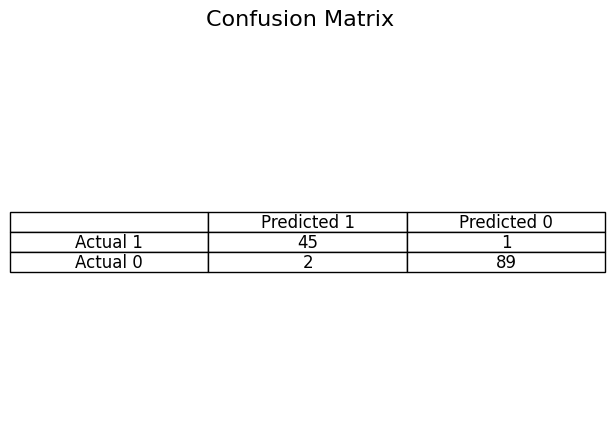

In [131]:
# displays a popout confusion matrix that can be saved.
# if probability is not specified, defaults to .5.
LogisticRegression.displayConfusionMatrix(testingSet,testingLabels,model)

We can also change the probability threshold, and it will update accordingly:

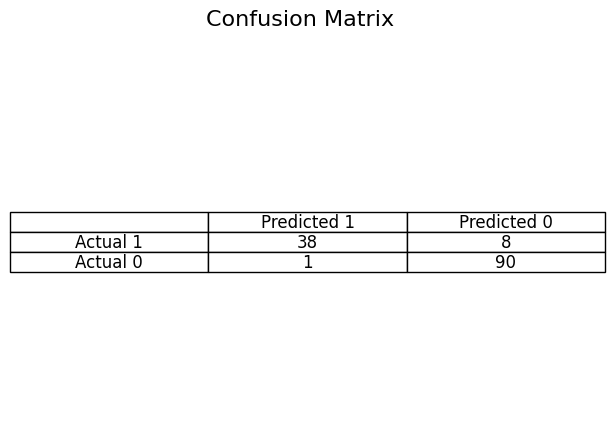

In [132]:
LogisticRegression.displayConfusionMatrix(testingSet,testingLabels,model,probabilityThreshold=.9)

## Logistic Graph

We can display a graph of the logistic function, as well as all of the correct/incorrect classifications like such:

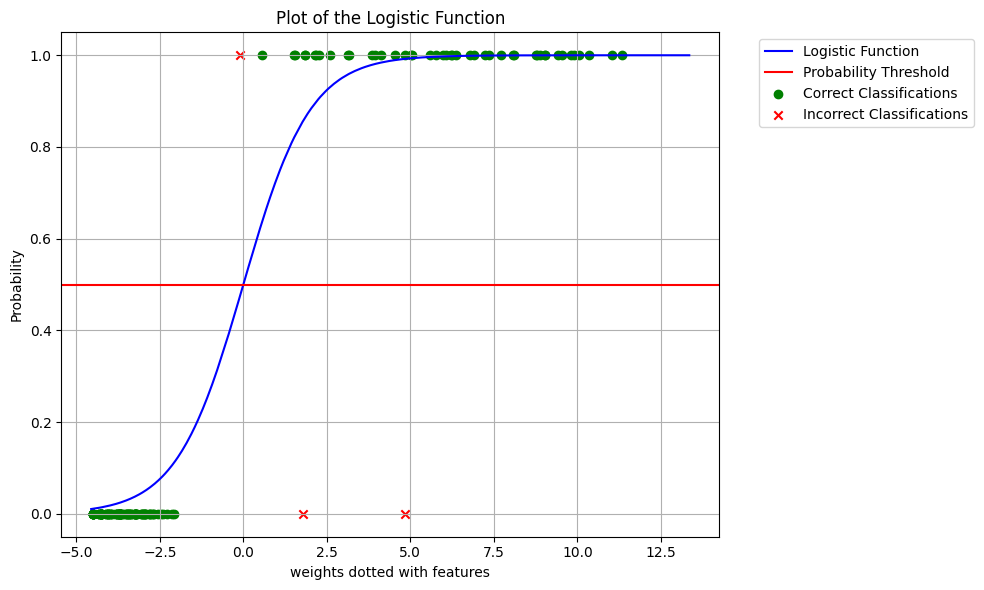

In [133]:
# displays the graph of the logistic regression model, complete with correct/incorrect classfications.
LogisticRegression.displayLogisticGraph(trainingSet,testingSet,testingLabels,model)

Changing the probability accordingly:

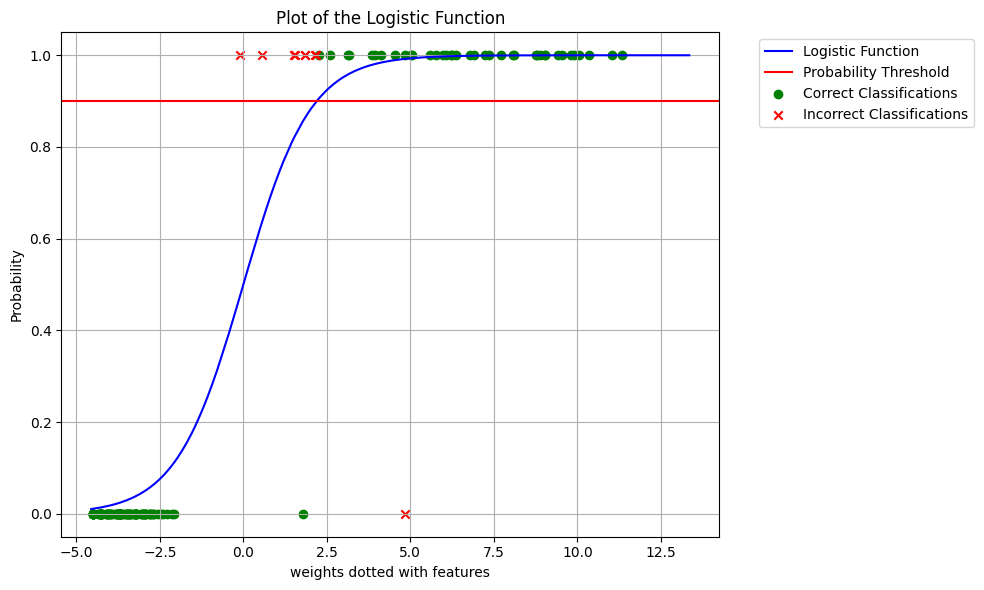

In [134]:
LogisticRegression.displayLogisticGraph(trainingSet,testingSet,testingLabels,model,probabilityThreshold=.9)

### **NOTE: this function requries the training set, as well as the testing set and testing labels of the model. This is so the logistic function line can be built. As a warning, this could be a common error people will get with the script.**

# Tools (Getters)
---

The following can be used to retrieve more in-depth analyses of the data:

## Get Classification
Returns a dictionary with the following format:

```
    GET CLASSIFICATION:
    follows the form of:
        'accuracy': accuracy,
            'class 0': {
                'precision': precision0,
                'recall': recall0,
                'f1-score': f1_0,
                'support': support0,
            },
            'class 1': {
                'precision': precision1,
                'recall': recall1,
                'f1-score': f1_1,
                'support': support1,
            },
            'macro avg': macroAvg,
            'weighted avg': weightedAvg'
```

**Here is example usage:**

In [135]:
classificationRaw = LogisticRegression.getClassificationReport(testingSet,testingLabels,model,probabilityThreshold=.5) # notice you can choose to specify probability, or omit it
print("Classification Report: \n", classificationRaw)

Classification Report: 
 {'accuracy': 0.9781021897810219, 'class 0': {'precision': 0.9888888888888889, 'recall': 0.978021978021978, 'f1-score': 0.9834254143646408, 'support': 91}, 'class 1': {'precision': 0.9574468085106383, 'recall': 0.9782608695652174, 'f1-score': 0.967741935483871, 'support': 46}, 'macro avg': {'precision': 0.9731678486997637, 'recall': 0.9781414237935977, 'f1-score': 0.9755836749242559, 'support': 137}, 'weighted avg': {'precision': 0.9783316940173596, 'recall': 0.9781021897810219, 'f1-score': 0.9781594287550393, 'support': 137}}


some things you can do, for example:

In [136]:
print("Class 0 F1 Score: ", classificationRaw['class 0']['f1-score'])
print("Class 1 F1 Score: ", classificationRaw['class 1']['f1-score'])


Class 0 F1 Score:  0.9834254143646408
Class 1 F1 Score:  0.967741935483871


## Get Confusion Matrix

gets the raw Confusion Matrix
First Value: True Positives, Second Value: False Positives, Third Value: False Negatives, Fourth Value: True Negatives

In [137]:
confusionMatrixRaw = LogisticRegression.getConfusionMatrix(testingSet,testingLabels,model,probabilityThreshold=.5)
print("Confusion Matrix: ", confusionMatrixRaw)
print("True Postives: " , confusionMatrixRaw[0])
print("False Postives: " , confusionMatrixRaw[1])
print("False Negatives: " , confusionMatrixRaw[2])
print("True Negatives: " , confusionMatrixRaw[3])

Confusion Matrix:  (45, 2, 1, 89)
True Postives:  45
False Postives:  2
False Negatives:  1
True Negatives:  89


Alternatively, you can save the confusion matrix to individual values:

In [138]:
truePositives, falsePositives, falseNegatives, trueNegatives = LogisticRegression.getConfusionMatrix(testingSet,testingLabels,model) 


## Get Accuracy

returns a single value of the accuracy of the model, based on the testing set and labels.

**Example Usage:**

In [139]:
accuracy = LogisticRegression.getAccuracy(testingSet,testingLabels,model)
print("Accuracy of model:",accuracy*100,"%")

Accuracy of model: 97.81020000000001 %


## Get Classifications

returns 2 numpy data frames of all the correctly classified cases in the dataset, and the incorrectly classified. This can be used for further analysis (ie. you can look at the data and see if there are any common traits in the errors.)

These come in as numpy dataframes, so for viewability you may choose to use pandas. This is why we saved the columns as columns.

**Example Usage:**

In [140]:
correct, incorrect = LogisticRegression.getClassifications(testingSet,testingLabels,model,probabilityThreshold=.5)

For better viewability, we turn it into pandas dataframes:

In [141]:
correct = pd.DataFrame(correct, columns=columns)
incorrect = pd.DataFrame(incorrect, columns=columns)
print("Number of correct classifications: ", len(correct))
print("Number of incorrect classifications: ", len(incorrect))

Number of correct classifications:  134
Number of incorrect classifications:  3


In [142]:
correct.head()


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1.283725,2.247947,0.253936,0.395356,2.118101,1.746411,1.849637,-0.286926,-0.352644,1.0
1,-0.878477,-0.715941,-0.753201,-0.647468,-0.551733,-0.710464,-1.008961,-0.618135,-0.352644,0.0
2,0.562991,2.247947,2.268210,-0.299860,2.118101,1.746411,1.441265,0.044283,0.783306,1.0
3,-0.157743,-0.715941,-0.753201,0.047748,-0.551733,-0.710464,-0.192219,-0.618135,-0.352644,0.0
4,-1.238845,-0.715941,-0.753201,-0.647468,-0.551733,-0.710464,-0.600590,-0.618135,-0.352644,0.0


In [143]:
incorrect.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0.562991,1.918627,1.261073,0.742964,0.783184,1.200439,0.216152,-0.286926,-0.352644,0.0
1,0.923358,-0.386620,0.253936,-0.647468,-0.106761,0.108494,-0.192219,0.044283,-0.352644,1.0
2,1.283725,0.272022,0.925361,0.047748,-0.106761,-0.710464,0.216152,0.044283,-0.352644,0.0
